In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.model_selection import GridSearchCV

listings_Boston = pd.read_csv("listings_Boston.csv")
listings_Seattle = pd.read_csv("listings_Seattle.csv")

C:\Users\soaka\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#checking shape of datasets
num_rows_boston = listings_Boston.shape[0]
num_columns_boston = listings_Boston.shape[1]
print('There are {} fields and {} attributes for boston listings.'.format(num_rows_boston,num_columns_boston))
num_rows_seattle = listings_Seattle.shape[0]
num_columns_seattle = listings_Seattle.shape[1]
print('There are {} fields and {} attributes for seattle listings.'.format(num_rows_seattle,num_columns_seattle))

There are 6036 fields and 96 attributes for boston listings.
There are 8494 fields and 96 attributes for seattle listings.


In [9]:
listings_Boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20180817025537,2018-08-17,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,NaN,NaN,f,f,super_strict_30,f,f,2,0.37
1,5506,https://www.airbnb.com/rooms/5506,20180817025537,2018-08-17,**$125 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,6,0.59
2,6695,https://www.airbnb.com/rooms/6695,20180817025537,2018-08-17,$125 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,6,0.65
3,6976,https://www.airbnb.com/rooms/6976,20180817025537,2018-08-17,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,f,moderate,t,f,1,0.62
4,8789,https://www.airbnb.com/rooms/8789,20180817025537,2018-08-17,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,10,0.33


In [10]:
listings_Seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20180816121209,2018-08-16,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,NaN,...,f,NaN,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,2,0.16
1,4291,https://www.airbnb.com/rooms/4291,20180816121209,2018-08-16,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,...,f,NaN,{WASHINGTON},f,f,moderate,f,f,5,0.91
2,5682,https://www.airbnb.com/rooms/5682,20180816121209,2018-08-16,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,NaN,{WASHINGTON},f,f,strict_14_with_grace_period,f,t,1,4.38
3,6606,https://www.airbnb.com/rooms/6606,20180816121209,2018-08-16,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...",...,f,NaN,{WASHINGTON},f,f,strict_14_with_grace_period,f,f,3,1.12
4,9419,https://www.airbnb.com/rooms/9419,20180816121209,2018-08-16,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,NaN,{WASHINGTON},f,f,moderate,t,t,5,1.29


In [3]:
# attributes for each boston entry.
listings_Boston.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
# attributes for each seattle entry.
listings_Seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
listings_Boston.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,6.036000e+03,6.036000e+03,0.0,0.0,0.0,6.036000e+03,0.0,6036.000000,6036.000000,0.0,...,4817.000000,4812.000000,4815.000000,4809.000000,4815.000000,4808.000000,4808.000000,0.0,6036.000000,4883.000000
mean,1.655896e+07,2.018082e+13,NaN,NaN,NaN,5.150357e+07,NaN,134.368456,134.368456,NaN,...,93.356446,9.588321,9.433229,9.742982,9.700727,9.524958,9.320507,NaN,33.019881,2.146275
std,7.628431e+06,9.258579e-01,NaN,NaN,NaN,5.325101e+07,NaN,336.786633,336.786633,NaN,...,8.171477,0.808583,0.949962,0.707155,0.729768,0.778722,0.874850,NaN,72.226257,2.240411
min,3.781000e+03,2.018082e+13,NaN,NaN,NaN,4.804000e+03,NaN,1.000000,1.000000,NaN,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.020000
25%,1.054745e+07,2.018082e+13,NaN,NaN,NaN,1.222273e+07,NaN,1.000000,1.000000,NaN,...,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.450000
50%,1.847572e+07,2.018082e+13,NaN,NaN,NaN,3.028359e+07,NaN,3.000000,3.000000,NaN,...,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,3.000000,1.330000
75%,2.265189e+07,2.018082e+13,NaN,NaN,NaN,8.252916e+07,NaN,24.250000,24.250000,NaN,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,17.000000,3.230000
max,2.781097e+07,2.018082e+13,NaN,NaN,NaN,2.095664e+08,NaN,1320.000000,1320.000000,NaN,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,292.000000,14.210000


In [6]:
listings_Seattle.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,zipcode,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,8.494000e+03,8.494000e+03,0.0,0.0,0.0,8.494000e+03,0.0,8494.000000,8494.000000,8421.000000,...,8494.000000,7466.000000,7462.000000,7463.000000,7460.000000,7463.000000,7461.000000,7462.000000,8494.000000,7532.000000
mean,1.573585e+07,2.018082e+13,NaN,NaN,NaN,4.467234e+07,NaN,49.748175,49.748175,98116.612160,...,40.505651,95.388428,9.734120,9.668230,9.840617,9.840547,9.740785,9.558563,20.304921,2.532843
std,7.783303e+06,3.687717e+00,NaN,NaN,NaN,5.045103e+07,NaN,171.330004,171.330004,17.639183,...,60.549633,6.276350,0.673914,0.691153,0.564809,0.557141,0.561103,0.720384,58.529470,2.392369
min,2.318000e+03,2.018082e+13,NaN,NaN,NaN,2.000000e+01,NaN,0.000000,0.000000,98032.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,9.231868e+06,2.018082e+13,NaN,NaN,NaN,7.290206e+06,NaN,1.000000,1.000000,98105.000000,...,3.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.617500
50%,1.718447e+07,2.018082e+13,NaN,NaN,NaN,2.417982e+07,NaN,2.000000,2.000000,98115.000000,...,16.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.770000
75%,2.215158e+07,2.018082e+13,NaN,NaN,NaN,6.550537e+07,NaN,6.000000,6.000000,98122.000000,...,52.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,3.950000
max,2.778951e+07,2.018082e+13,NaN,NaN,NaN,2.097034e+08,NaN,1109.000000,1109.000000,98199.000000,...,705.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,302.000000,17.000000


In [7]:
def preprocess(listings):
    '''
    input:
        listings: The listings dataset of target city.
    output:
        df2: The preprocessed (Cleaning, Filling Missing data, One-hot encoding, MinMax transform) listings.
        price_raw: Split from original listings and serve as target in training process.
        possible_amenities: Return all amenities listed by Airbnb host in certain city.
    '''

    # Plot the Ratio of missing data for all Column
    null_list = listings.isnull().sum()
    null_per = null_list / len(listings) * 100
    '''
    plt.figure(figsize=(15,5))
    plt.title('Distribution of the Ratio of Missing Data in Each Column')
    plt.hist(null_per, bins = np.linspace(10,100,50))
    plt.xlabel('Percentage of Missing Data')
    plt.ylabel('Count')
    plt.show()
    '''
    
    # Drop part of the columns with high ratio of missing data
    drop_index = null_per[null_per > 50].index
    listings.drop(drop_index, axis = 1, inplace = True)
    
    # Preprocess 'price' columns into numerical value
    if type(listings.price[0]) == str:
        listings.price = listings.price.apply(lambda x: float(x[1:].replace(',', '')))
    print(listings.price.describe())
    # Plot the distribution of price in Certain City
    plt.figure(figsize=(12,4))
    plt.title('Distribution of the Price')
    plt.hist(listings.price,bins = np.linspace(0,1000,100))
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()
    
    # Drop large price rows and some other useless columns
    drop_price_index = listings[listings.price > 500].index
    listings.drop(drop_price_index, axis = 0, inplace = True)
    listings.drop(['space', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 
               'experiences_offered', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_about', 'host_neighbourhood',
              'host_picture_url', 'host_location', 'street', 'city', 'state', 'smart_location', 'country_code', 'country', 'first_review', 'last_review', 'id', 'host_verifications', 
               'host_id', 'neighbourhood', 'calendar_last_scraped', 'market'], axis = 1, inplace = True)
    
    # Preprocess the 'host_since' column
    now = datetime.strptime('2018-09-19','%Y-%m-%d')
    listings.host_since = listings.host_since.apply(lambda x: (now - datetime.strptime(x, '%Y-%m-%d')).days)
    
    # Take care of 'amenities' column (transfer into catagorical column)
    df = listings
    amenities = df['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")])
    df['amenities'] = amenities
    possible_amenities = set([item for sublist in amenities for item in sublist])
    possible_amenities = list(possible_amenities)
    del possible_amenities[1]
    print("There are {} amenities in total.".format(len(possible_amenities)))
    mlb = MultiLabelBinarizer()
    amenities_result = pd.DataFrame(mlb.fit_transform(df['amenities']),columns=mlb.classes_, index=df.index)
    df2 = pd.concat([df, amenities_result], axis=1, sort = False)
    df2.drop(['amenities'], axis = 1, inplace = True)
    
    # Preprocess some other columns, convert into numerical value
    df2['cleaning_fee'] = df2['cleaning_fee'].replace( '[$,]','', regex=True ).astype(float)
    df2['extra_people'] = df2['extra_people'].replace( '[$,]','', regex=True ).astype(float)
    df2['security_deposit'] = df2['security_deposit'].replace( '[$,]','', regex=True ).astype(float)
    df2['host_response_rate'] = df2['host_response_rate'].replace( '%','', regex=True ).astype(float)
    if type(df2.zipcode[0]) == str:
        df2.zipcode = df2.zipcode.str[:5].apply(lambda x: float(x))
    
    # Fill missing data
    df2.bathrooms.fillna(df2.groupby("bedrooms")["bathrooms"].transform("median"), inplace=True)
    df2.beds.fillna(df2.groupby("bedrooms")["beds"].transform("median"), inplace=True)
    df2.bedrooms.fillna(df2.groupby("bathrooms")["bedrooms"].transform("median"), inplace=True)
    df2.security_deposit.fillna(0, inplace = True)
    df2.cleaning_fee.fillna(0, inplace = True)
    fillmean_list = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                     'review_scores_location', 'review_scores_value', 'reviews_per_month']
    for col in fillmean_list:
        df2[col].fillna(df[col].mean(), inplace = True)
    df2['host_response_rate'].fillna(df2.host_response_rate.mean(), inplace = True)   
    df2.zipcode.fillna(listings_Boston.groupby('neighbourhood_cleansed')['zipcode'].apply(lambda x: x.fillna(x.value_counts().index[0])), inplace = True)
    
    # One-hot encoding the whole dataframe
    df2 = pd.get_dummies(df2)
    price_raw = df2['price']
    df2 = df2.drop('price', axis = 1)
    
    # Use MinMax to process some of the numerical data
    scaler = MinMaxScaler()
    numerical = ['host_since', 'latitude', 'longitude', 'review_scores_rating']
    df2[numerical] = scaler.fit_transform(df2[numerical])
    return df2, price_raw, possible_amenities

# Training

In [8]:
def train(df2, price_raw, possible_amenities):
    '''
    input:
        df2: The preprocessed (Cleaning, Filling Missing data, One-hot encoding, MinMax transform) listings.
        price_raw: Split from original listings and serve as target in training process.
        possible_amenities: Return all amenities listed by Airbnb host in certain city.
    output:
        None
    '''
    
    
    # Split the preprocessed dataset into train/test dataset
    X_train, X_test, y_train, y_test = train_test_split(df2, price_raw, test_size = 0.2, random_state = 0)
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    
    # Grid Search to find Best Parameter
    param_grid = {'n_estimators': [400], 
                  'learning_rate': [0.05],
                  'max_depth': [10],
                  'min_samples_split': [5],
                  'subsample': [0.7]
                 }

    forest_reg = GradientBoostingRegressor(random_state = 42)
    grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    y_pred = grid_search.predict(X_test)
    print("Error Score on Test Data: {}.".format(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))))
    # Plot Featrue Importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    features = sorted(zip(feature_importances, df2.columns), reverse=True)
    attribute = []
    coefficient = []
    for feature in features:
        attribute.append(feature[1]) 
        coefficient.append(feature[0])
    plt.figure(figsize=(12,4))
    plt.bar(attribute[:20], height=coefficient[:20])
    plt.xticks(rotation=90)
    plt.xlabel('feature')
    plt.ylabel('feature importance')
    plt.title('feature importance for the Top 20 features')
    plt.show()
    
    # Plot Amenity importance
    amenity= []
    amn_coef = []
    for feature in features:
        if feature[1] in possible_amenities:
            amenity.append(feature[1])
            amn_coef.append(feature[0])
    plt.figure(figsize=(8,4))
    plt.bar(amenity[:10], height=amn_coef[:10])
    plt.xticks(rotation = 90)
    plt.xlabel('amenity')
    plt.ylabel('amenity importance')
    plt.title('feature importance for the Top 10 amenities')
    plt.show()

## Analysis

### Top amenities required by people

count    6036.000000
mean      184.089629
std       184.401721
min         0.000000
25%        80.000000
50%       140.000000
75%       219.000000
max      3999.000000
Name: price, dtype: float64


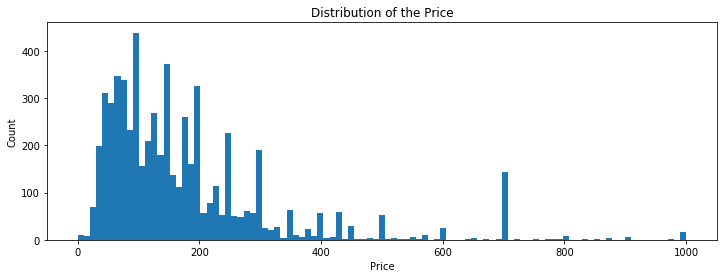

There are 120 amenities in total.
count    8494.000000
mean      152.532494
std       137.133373
min         0.000000
25%        80.000000
50%       119.000000
75%       189.000000
max      5400.000000
Name: price, dtype: float64


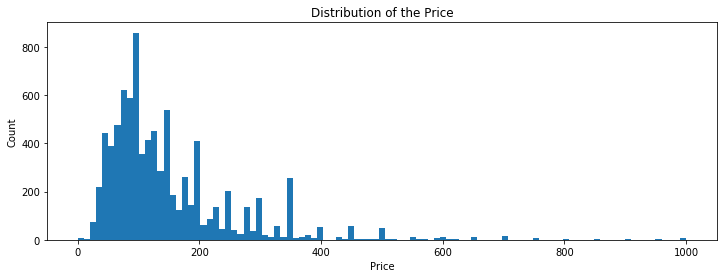

There are 168 amenities in total.


In [11]:
Boston, price_Boston, possible_amenities_Boston = preprocess(listings_Boston)
Seattle, dprice_Seattle, possible_amenities_Seattle = preprocess(listings_Seattle)

## visualize
#### What are the most important features to estimate Airbnb rental price?
#### Are there differences between Seattle and Boston Airbnb ?

Training set has 4611 samples.
Testing set has 1153 samples.
{'learning_rate': 0.05, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400, 'subsample': 0.7}
51.46092187535489 {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400, 'subsample': 0.7}
Error Score on Test Data: 48.900546614661145.


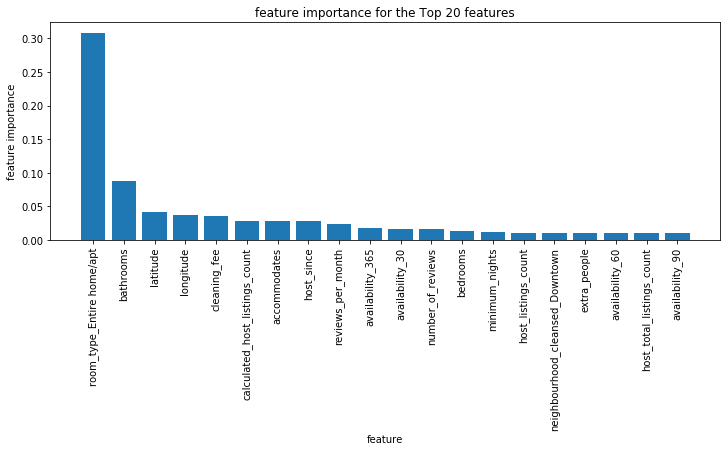

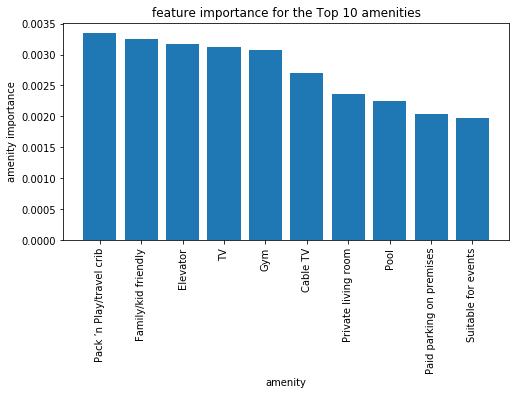

Training set has 6701 samples.
Testing set has 1676 samples.
{'learning_rate': 0.05, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400, 'subsample': 0.7}
50.22463602226767 {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400, 'subsample': 0.7}
Error Score on Test Data: 45.866511717914655.


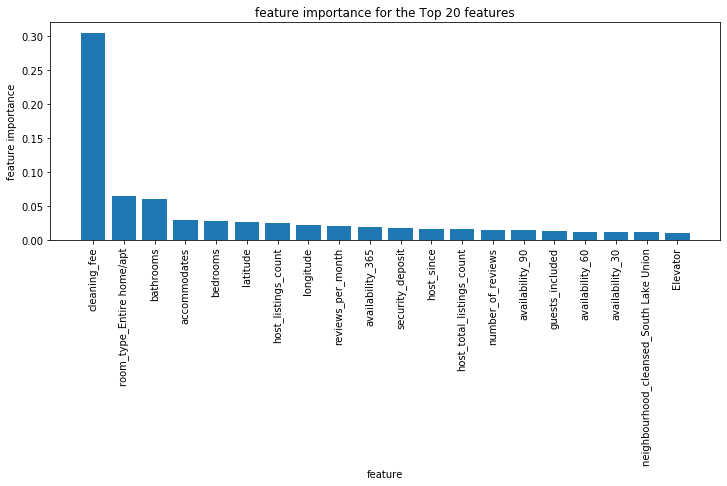

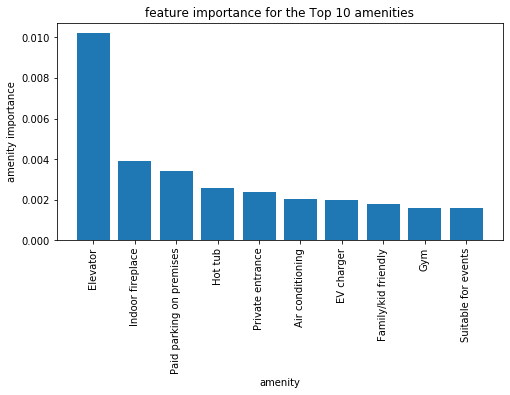

In [14]:
train(Boston, price_Boston, possible_amenities_Boston)
train(Seattle, dprice_Seattle, possible_amenities_Seattle)